In [5]:
# Import Libraries

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np 
import seaborn as sns

In [25]:
# Define the CNN model 

model = Sequential([
    Conv2D(32,(3,3), padding='same', input_shape=(150,150,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


c:\Users\Dell\Downloads\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Set up data generators with resizing and augmentation

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
  r'D:\UNI (2)\Brain Tumor Project\split_dataset\train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
r'D:\UNI (2)\Brain Tumor Project\split_dataset\val',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 2684 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [27]:
# Print shapes after resizing

for data_batch, labels_batch in train_generator:
    print('Training data batch shape: ', data_batch.shape)
    break
for data_batch, labels_batch in validation_generator:
    print('Validation data batch shape:', data_batch.shape)
    break

Training data batch shape:  (32, 150, 150, 3)
Validation data batch shape: (23, 150, 150, 3)


In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,330,881 (81.37 MB)

 Trainable params: 21,329,409 (81.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [29]:
# Train the model 

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=70,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)
)

Epoch 1/70


c:\Users\Dell\Downloads\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 70s 800ms/step - accuracy: 0.7540 - loss: 0.8340 - val_accuracy: 0.4783 - val_loss: 0.6715
Epoch 2/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/70


c:\Users\Dell\Downloads\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


84/84 ━━━━━━━━━━━━━━━━━━━━ 69s 806ms/step - accuracy: 0.8506 - loss: 0.3658 - val_accuracy: 0.5652 - val_loss: 0.6261
Epoch 4/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 70s 816ms/step - accuracy: 0.8557 - loss: 0.3485 - val_accuracy: 0.9130 - val_loss: 0.5517
Epoch 6/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 144us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 794ms/step - accuracy: 0.8781 - loss: 0.3211 - val_accuracy: 0.6957 - val_loss: 0.5729
Epoch 8/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 67s 781ms/step - accuracy: 0.8800 - loss: 0.2928 - val_accuracy: 0.6957 - val_loss: 0.7398
Epoch 10/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/70
84/84 ━━━━━━━━━━━━━━━━━━━━ 67s 787ms/step - accuracy: 0.8862 - loss: 0.2746 - val_accuracy: 0.6957 - val_l

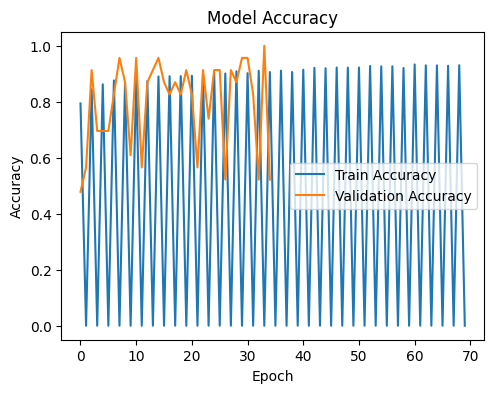

In [30]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

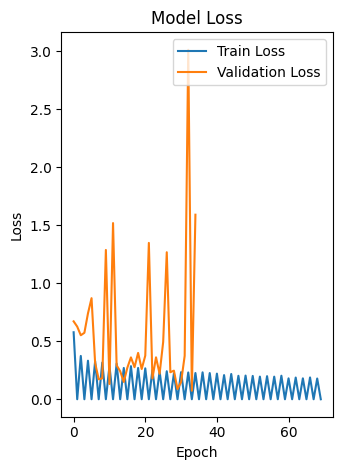

In [31]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
Confusion Matrix:
[[12  0]
 [10  1]]
F1 Score: 0.16666666666666666
Accuracy: 0.5652173913043478


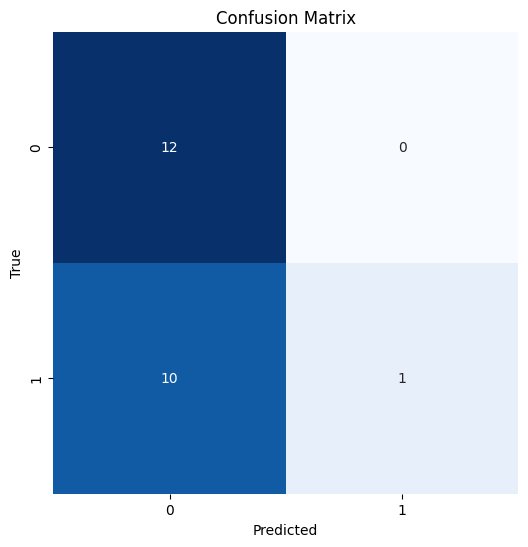

In [32]:
# Evaluate the model: Compute F1 score, accuracy, and confusion matrix
y_pred = model.predict(validation_generator)
y_pred = (y_pred > 0.5).astype(int).flatten()
y_true = validation_generator.classes

# Confusion Matrix (Error Rate Matrix)
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# F1 Score
f1 = f1_score(y_true, y_pred)
print('F1 Score:', f1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()